In [1]:
import geopandas as gpd
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import math
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as qsns
from matplotlib import font_manager, rc

font_path = r'C:/Users/user/NanumFontSetup_TTF_ALL/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_path, size=18).get_name()
rc('font',family=font_name)

## 버스 정류소 승하차 데이터 및 집계구 데이터 결합

In [2]:
bus_stop_500m = pd.read_csv('./data/전처리 필요/버스정류소_500m_집계구.csv',encoding="EUC-KR")
bus_stop_ctm = pd.read_csv('./bus_stop_ctm_with_pos.csv')
# bus_stop_ctm.head()

In [3]:
display(bus_stop_500m.columns)
display(bus_stop_ctm.columns)

Index(['TOT_REG_CD', 'ADM_NM', 'ADM_CD', '표준ID', '정류소명', 'X좌표', 'Y좌표'], dtype='object')

Index(['Unnamed: 0', '표준ID', '역명', 'X좌표', 'Y좌표', '승차', '하차', '월평균승차수',
       '월평균하차수'],
      dtype='object')

In [4]:
bus_stop_ctm = bus_stop_ctm.drop(columns={'Unnamed: 0','X좌표','Y좌표'},axis=1)

In [5]:
bus_stop_ctm.head()

,표준ID,역명,승차,하차,월평균승차수,월평균하차수
0,100000001,종로2가사거리,16268,18770,524.774194,605.483871
1,100000002,창경궁.서울대학교병원,71781,65493,2315.516129,2112.677419
2,100000003,명륜3가.성대입구,135181,98023,4360.677419,3162.032258
3,100000004,종로2가.삼일교,23281,25222,751.000000,813.612903
4,100000005,혜화동로터리.여운형활동터,52730,94273,1700.967742,3041.064516


In [6]:
bus_stop_500m.head()

,TOT_REG_CD,ADM_NM,ADM_CD,표준ID,정류소명,X좌표,Y좌표
0,1101053010006,사직동,1101053,100900005,오거리.한옥마을입구,126.969547,37.579499
1,1101053010006,사직동,1101053,100900104,오거리.한옥마을입구,126.969737,37.579511
2,1101053010001,사직동,1101053,100900118,종로문화센터,126.964572,37.574663
3,1101053010001,사직동,1101053,100900133,카센터.터널앞,126.965896,37.574092
4,1101053010001,사직동,1101053,100900073,한국사회과학자료원,126.964091,37.573652


In [7]:
display(len(bus_stop_500m))
display(len(bus_stop_500m['표준ID'].unique()))
display(len(bus_stop_500m['TOT_REG_CD'].unique()))

34912

10913

10846

In [8]:
bus_stop_data = bus_stop_500m.merge(bus_stop_ctm,left_on='표준ID',right_on='표준ID')
bus_stop_data.head()

,TOT_REG_CD,ADM_NM,ADM_CD,표준ID,정류소명,X좌표,Y좌표,역명,승차,하차,월평균승차수,월평균하차수
0,1101053010006,사직동,1101053,100900005,오거리.한옥마을입구,126.969547,37.579499,오거리.한옥마을입구,2756,357,88.903226,11.516129
1,1101072010014,청운효자동,1101072,100900005,오거리.한옥마을입구,126.969547,37.579499,오거리.한옥마을입구,2756,357,88.903226,11.516129
2,1101072010009,청운효자동,1101072,100900005,오거리.한옥마을입구,126.969547,37.579499,오거리.한옥마을입구,2756,357,88.903226,11.516129
3,1101072010002,청운효자동,1101072,100900005,오거리.한옥마을입구,126.969547,37.579499,오거리.한옥마을입구,2756,357,88.903226,11.516129
4,1101053010006,사직동,1101053,100900104,오거리.한옥마을입구,126.969737,37.579511,오거리.한옥마을입구,140,3537,4.516129,114.096774


In [9]:
bus_stop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33955 entries, 0 to 33954
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TOT_REG_CD  33955 non-null  int64  
 1   ADM_NM      33955 non-null  object 
 2   ADM_CD      33955 non-null  int64  
 3   표준ID        33955 non-null  int64  
 4   정류소명        33955 non-null  object 
 5   X좌표         33955 non-null  float64
 6   Y좌표         33955 non-null  float64
 7   역명          33955 non-null  object 
 8   승차          33955 non-null  int64  
 9   하차          33955 non-null  int64  
 10  월평균승차수      33955 non-null  float64
 11  월평균하차수      33955 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 3.4+ MB


In [10]:
bus_stop_data[['TOT_REG_CD','ADM_CD']] = bus_stop_data[['TOT_REG_CD','ADM_CD']].astype(str)

In [11]:
bus_stop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33955 entries, 0 to 33954
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TOT_REG_CD  33955 non-null  object 
 1   ADM_NM      33955 non-null  object 
 2   ADM_CD      33955 non-null  object 
 3   표준ID        33955 non-null  int64  
 4   정류소명        33955 non-null  object 
 5   X좌표         33955 non-null  float64
 6   Y좌표         33955 non-null  float64
 7   역명          33955 non-null  object 
 8   승차          33955 non-null  int64  
 9   하차          33955 non-null  int64  
 10  월평균승차수      33955 non-null  float64
 11  월평균하차수      33955 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 3.4+ MB


In [12]:
bus_stop_data_left = bus_stop_500m.merge(bus_stop_ctm,how='left',left_on='표준ID',right_on='표준ID')

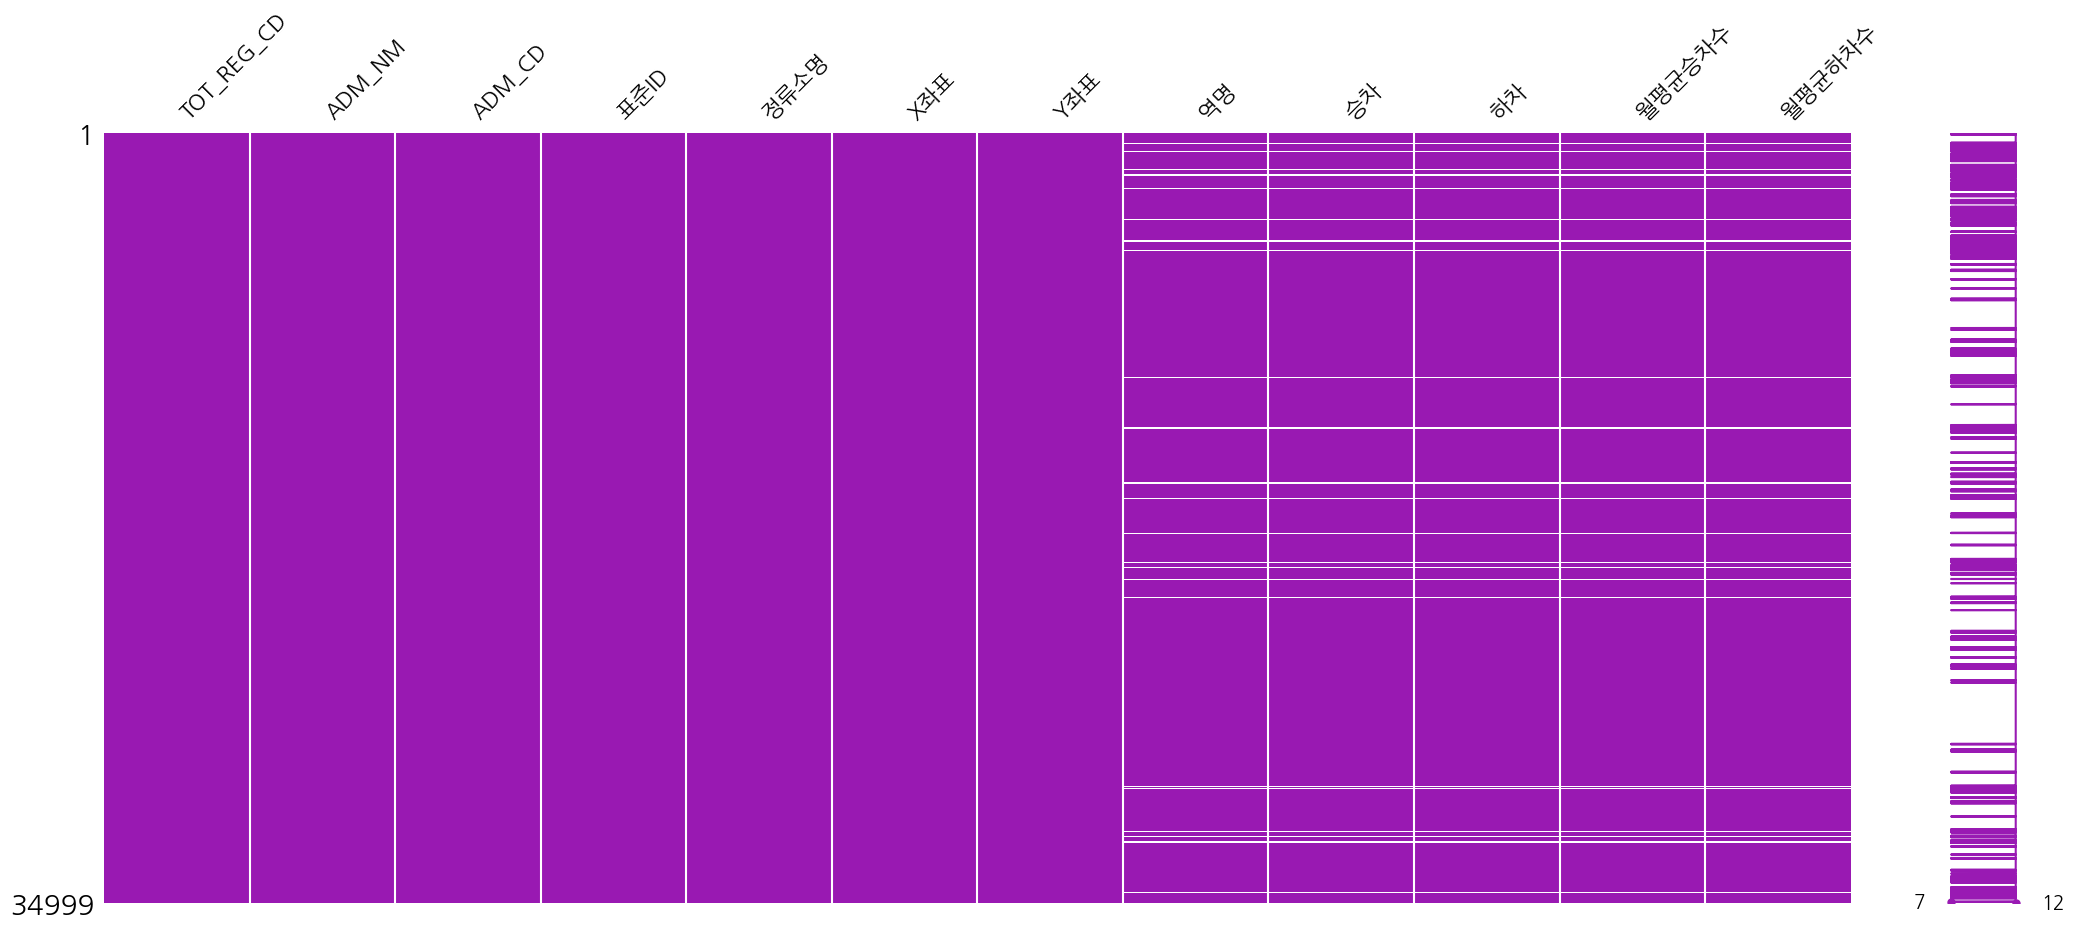

In [13]:
# 집계구 데이터에는 데이터가 있는데, 승하차 데이터는 없는 경우
msno.matrix(df=bus_stop_data_left,color=(0.6,0.1,0.7))
plt.show()

In [14]:
bus_stop_data_right = bus_stop_500m.merge(bus_stop_ctm,how='right',left_on='표준ID',right_on='표준ID')

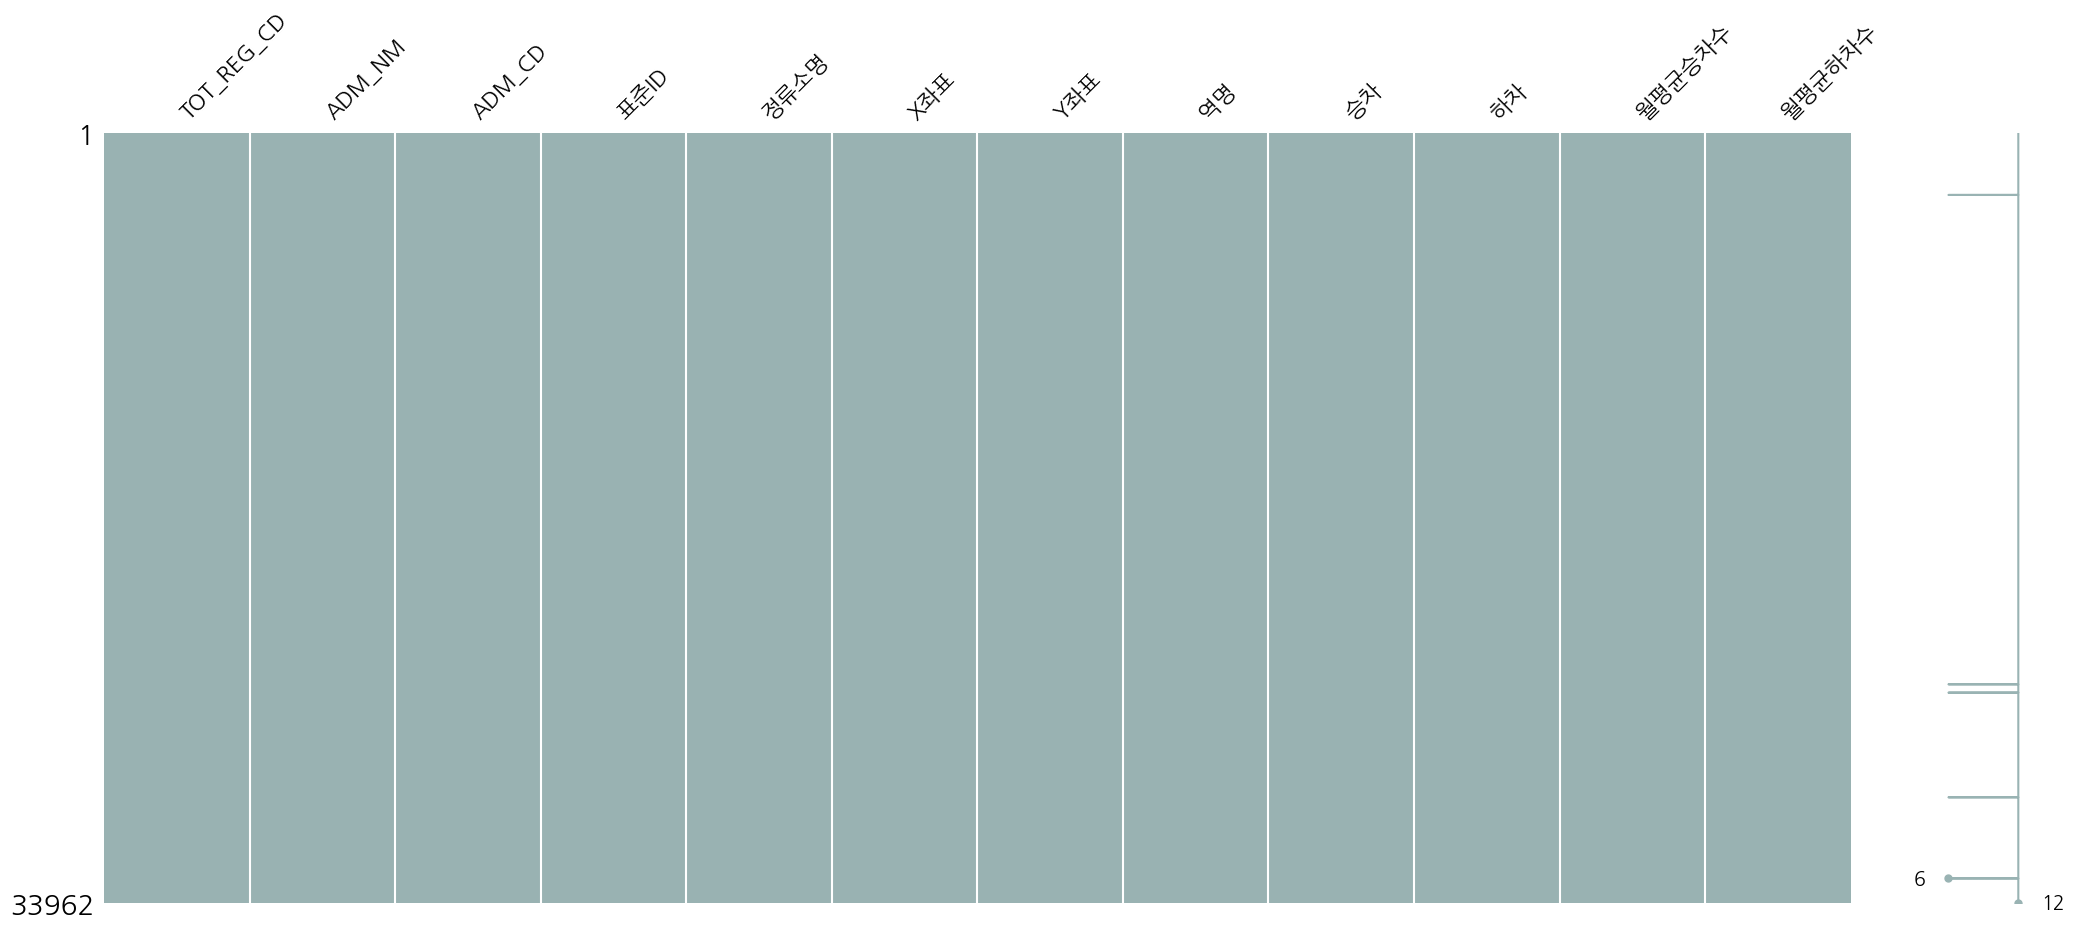

In [15]:
# 승하차 데이터는 있는데 집계구 파일에 데이터가 없는 경우는 없다.
# 즉, 집계구에 있는 모든 데이터와 matching된다.

msno.matrix(df=bus_stop_data_right,color=(0.6,0.7,0.7))
plt.show()

In [16]:
bus_stop_data.drop('역명',axis=1,inplace=True)

In [17]:
bus_stop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33955 entries, 0 to 33954
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TOT_REG_CD  33955 non-null  object 
 1   ADM_NM      33955 non-null  object 
 2   ADM_CD      33955 non-null  object 
 3   표준ID        33955 non-null  int64  
 4   정류소명        33955 non-null  object 
 5   X좌표         33955 non-null  float64
 6   Y좌표         33955 non-null  float64
 7   승차          33955 non-null  int64  
 8   하차          33955 non-null  int64  
 9   월평균승차수      33955 non-null  float64
 10  월평균하차수      33955 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 3.1+ MB


In [18]:
bus_stop_data[bus_stop_data['표준ID'] == 1101053010006]

,TOT_REG_CD,ADM_NM,ADM_CD,표준ID,정류소명,X좌표,Y좌표,승차,하차,월평균승차수,월평균하차수


In [19]:
bus_stop_data[bus_stop_data['TOT_REG_CD']=='1101053010006']

,TOT_REG_CD,ADM_NM,ADM_CD,표준ID,정류소명,X좌표,Y좌표,승차,하차,월평균승차수,월평균하차수
0,1101053010006,사직동,1101053,100900005,오거리.한옥마을입구,126.969547,37.579499,2756,357,88.903226,11.516129
4,1101053010006,사직동,1101053,100900104,오거리.한옥마을입구,126.969737,37.579511,140,3537,4.516129,114.096774


In [20]:
bus_stop_count = bus_stop_data.groupby('TOT_REG_CD').size()
count = list()

for i, row in bus_stop_data.iterrows():
    tot_reg_cd = row.loc['TOT_REG_CD'] # 집계구 코드를 가져와서 저장.
    count.append(bus_stop_count.loc[tot_reg_cd])

bus_stop_data['정류장수'] = pd.Series(count)

In [21]:
bus_stop_data.head()

,TOT_REG_CD,ADM_NM,ADM_CD,표준ID,정류소명,X좌표,Y좌표,승차,하차,월평균승차수,월평균하차수,정류장수
0,1101053010006,사직동,1101053,100900005,오거리.한옥마을입구,126.969547,37.579499,2756,357,88.903226,11.516129,2
1,1101072010014,청운효자동,1101072,100900005,오거리.한옥마을입구,126.969547,37.579499,2756,357,88.903226,11.516129,5
2,1101072010009,청운효자동,1101072,100900005,오거리.한옥마을입구,126.969547,37.579499,2756,357,88.903226,11.516129,6
3,1101072010002,청운효자동,1101072,100900005,오거리.한옥마을입구,126.969547,37.579499,2756,357,88.903226,11.516129,4
4,1101053010006,사직동,1101053,100900104,오거리.한옥마을입구,126.969737,37.579511,140,3537,4.516129,114.096774,2


In [22]:
bus_stop_ride = bus_stop_data.groupby('TOT_REG_CD')['승차'].sum()
bus_stop_get_off = bus_stop_data.groupby('TOT_REG_CD')['하차'].sum()
count_ride = list()
count_get_off = list()

for i, row in bus_stop_data.iterrows():
    tot_reg_cd = row.loc['TOT_REG_CD'] # 집계구 코드를 가져와서 저장.
    count_ride.append(bus_stop_ride.loc[tot_reg_cd]/row['정류장수']/31)
    count_get_off.append(bus_stop_get_off.loc[tot_reg_cd]/row['정류장수']/31)

bus_stop_data['평균승차수'] = pd.Series(count_ride)
bus_stop_data['평균하차수'] = pd.Series(count_get_off)

In [23]:
bus_stop_data.head()

,TOT_REG_CD,ADM_NM,ADM_CD,표준ID,정류소명,X좌표,Y좌표,승차,하차,월평균승차수,월평균하차수,정류장수,평균승차수,평균하차수
0,1101053010006,사직동,1101053,100900005,오거리.한옥마을입구,126.969547,37.579499,2756,357,88.903226,11.516129,2,46.709677,62.806452
1,1101072010014,청운효자동,1101072,100900005,오거리.한옥마을입구,126.969547,37.579499,2756,357,88.903226,11.516129,5,432.187097,361.929032
2,1101072010009,청운효자동,1101072,100900005,오거리.한옥마을입구,126.969547,37.579499,2756,357,88.903226,11.516129,6,284.532258,458.747312
3,1101072010002,청운효자동,1101072,100900005,오거리.한옥마을입구,126.969547,37.579499,2756,357,88.903226,11.516129,4,85.427419,114.798387
4,1101053010006,사직동,1101053,100900104,오거리.한옥마을입구,126.969737,37.579511,140,3537,4.516129,114.096774,2,46.709677,62.806452


In [24]:
len(bus_stop_data)

33955

In [25]:
bus_stop_data.to_csv('집계구별 정류장수 및 승하차 데이터.csv')